# Hodina 5: Lidská vs. strojová inteligence

## Obsah hodiny
- Definice a charakteristiky lidské inteligence
- Charakteristiky strojové inteligence
- Srovnání schopností
- Výhody a nevýhody obou typů
- Synergie a spolupráce

---

## 1. Lidská inteligence

### Charakteristiky lidské inteligence:

1. **Obecná inteligence**
   - Schopnost řešit různorodé problémy
   - Přenos znalostí mezi oblastmi

2. **Emoční inteligence**
   - Rozpoznávání a řízení emocí
   - Empatie a sociální dovednosti

3. **Kreativita**
   - Originalita a inovace
   - Umělecké vyjádření

4. **Intuice**
   - Podvědomé zpracování
   - "Šestý smysl"

5. **Vědomí**
   - Sebeuvědomění
   - Subjektivní zkušenost

# Hodina 5 — Lidská vs. strojová inteligence

Tuto hodinu si povíme, jak se myslí člověk a jak "myslí" počítač. Vysvětlíme to jednoduše, jako bychom to říkali desetiletému dítěti:

- Lidské myšlení: používá intuici, emoce, zkušenosti a někdy i hádky.
- Strojové myšlení: dělá přesné výpočty, hledá vzory v datech a opakuje to, co se naučilo.

Cíl: porovnat silné a slabé stránky člověka a stroje a udělat malý praktický test, kde si vyzkoušíme pravidlový (člověku podobný) přístup a naivní algoritmický přístup.

In [ ]:
# Malý experiment: rozlušti logickou hádanku pravidly a pak zkus, co udělá LLM (pokud je nainstalovaný)
# Hádanka: Kdo vlastní auto mezi A, B, C, když víme:
# 1) A nemá auto
# 2) Pokud B nemá auto, pak C má auto
# 3) Buď B nebo A má auto
# Očekávané řešení: B má auto

# Pravidlový (logický) přístup:
people = {'A': None, 'B': None, 'C': None}
# A nemá auto
people['A'] = False
# Podmínka 3: buď B nebo A má auto -> protože A=False, B musí být True
people['B'] = True
# Podmínka 2 vyhoví automaticky (pokud B=False pak C=True) -> netřeba měnit
people_expected = {'A': False, 'B': True, 'C': None}
print('Pravidlové řešení:', people_expected)

# Jednoduchý test
assert people_expected['B'] == True, 'Očekáváme, že B má auto'

# Pokus s LLM (pokud je k dispozici - optional): zkusíme transformers lokálně pokud je nainstalováno.
try:
    from transformers import pipeline
    nlp = pipeline('text-generation', model='gpt2')
    prompt = ("Máme následující informace: 1) A nemá auto. 2) Pokud B nemá auto, pak C má auto. 3) Buď B nebo A má auto. "
              "Kdo má auto? Odpověz stručně jedním písmenem (A/B/C).")
    out = nlp(prompt, max_length=30, do_sample=False)
    answer = out[0]['generated_text']
    print('\nVýstup LLM (raw):')
    print(answer)
except Exception as e:
    print('\nLLM fallback nebyl dostupný nebo nastala chyba (to je OK v Colab).', str(e))
    print('Pravidlové řešení je dostačující pro tuto aktivitu.')

## Úkol a reflexe

1) Popiš, proč pravidlový přístup (to, co jsme udělali ručně) dal správné řešení.\n
2) Co by se stalo, kdybychom měli složitější hádanku s více neurčitostmi? Kdy by byl lepší LLM nebo algoritmický přístup?\n
3) Bonus: Pokud máš přístup k internetu/Colab a transformers, spusť buňku s LLM a porovnej odpovědi.

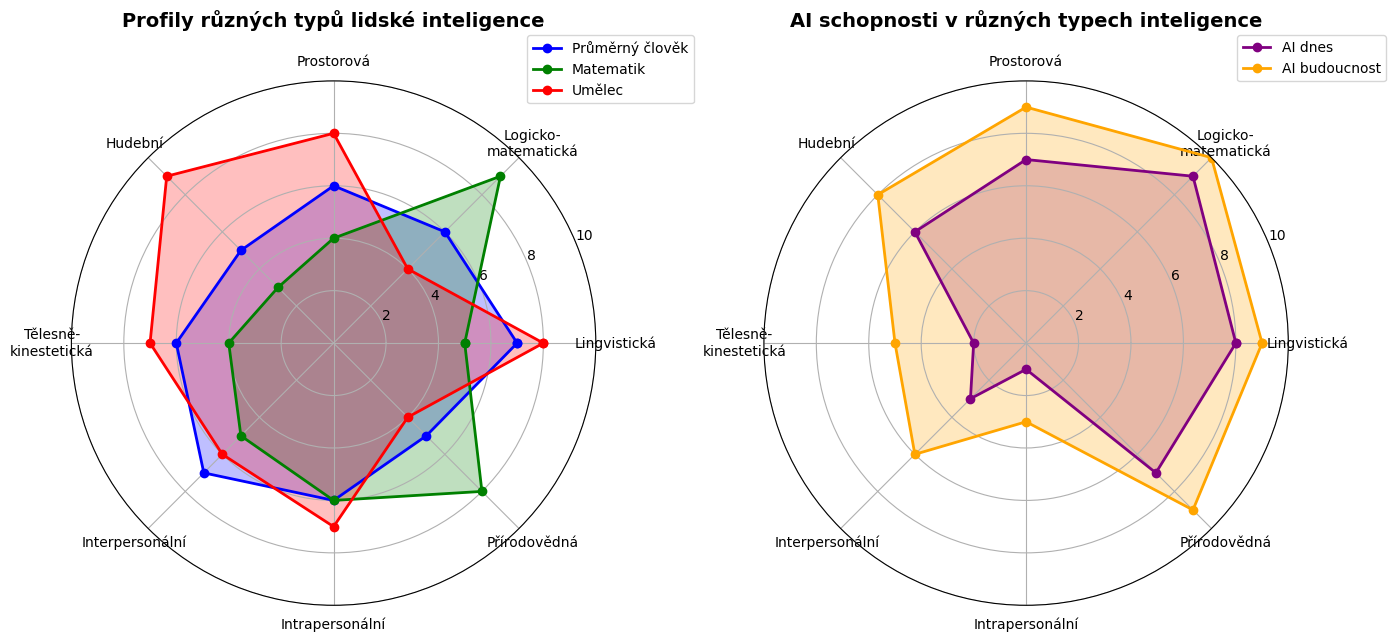

Lidská inteligence je multidimenzionální - každý má jedinečný profil schopností.
AI exceluje v některých oblastech, ale zaostává v jiných.


In [1]:
# Vizualizace typů lidské inteligence (Gardnerova teorie)
import matplotlib.pyplot as plt
import numpy as np

# Gardnerovy typy inteligence
typy_inteligence = [
    'Lingvistická',
    'Logicko-\nmatematická',
    'Prostorová',
    'Hudební',
    'Tělesně-\nkinestetická',
    'Interpersonální',
    'Intrapersonální',
    'Přírodovědná'
]

# Simulace průměrných schopností
prumerny_clovek = [7, 6, 6, 5, 6, 7, 6, 5]
specialista = [5, 9, 4, 3, 4, 5, 6, 8]  # Např. matematik-přírodovědec
umelec = [8, 4, 8, 9, 7, 6, 7, 4]  # Např. hudebník

# Vytvoření radarového grafu
angles = np.linspace(0, 2 * np.pi, len(typy_inteligence), endpoint=False).tolist()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), subplot_kw=dict(projection='polar'))

# Graf 1: Porovnání profilů
def plot_radar(ax, data, label, color):
    data += data[:1]
    angles_plot = angles + angles[:1]
    ax.plot(angles_plot, data, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles_plot, data, alpha=0.25, color=color)

plot_radar(ax1, prumerny_clovek.copy(), 'Průměrný člověk', 'blue')
plot_radar(ax1, specialista.copy(), 'Matematik', 'green')
plot_radar(ax1, umelec.copy(), 'Umělec', 'red')

ax1.set_xticks(angles)
ax1.set_xticklabels(typy_inteligence)
ax1.set_ylim(0, 10)
ax1.set_title('Profily různých typů lidské inteligence', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax1.grid(True)

# Graf 2: AI schopnosti v těchto oblastech
ai_schopnosti = [8, 9, 7, 6, 2, 3, 1, 7]  # Současné AI
ai_budoucnost = [9, 10, 9, 8, 5, 6, 3, 9]  # Potenciální budoucí AI

plot_radar(ax2, ai_schopnosti.copy(), 'AI dnes', 'purple')
plot_radar(ax2, ai_budoucnost.copy(), 'AI budoucnost', 'orange')

ax2.set_xticks(angles)
ax2.set_xticklabels(typy_inteligence)
ax2.set_ylim(0, 10)
ax2.set_title('AI schopnosti v různých typech inteligence', fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
ax2.grid(True)

plt.tight_layout()
plt.show()

print("Lidská inteligence je multidimenzionální - každý má jedinečný profil schopností.")
print("AI exceluje v některých oblastech, ale zaostává v jiných.")

## 2. Strojová inteligence

### Charakteristiky strojové inteligence:

1. **Specializace**
   - Excelentní v úzkých oblastech
   - Obtížný přenos mezi doménami

2. **Rychlost a přesnost**
   - Miliony operací za sekundu
   - Minimální chybovost v rutinních úlohách

3. **Škálovatelnost**
   - Snadné kopírování a distribuce
   - Paralelní zpracování

4. **Konzistence**
   - Stejný výkon 24/7
   - Bez únavy nebo emocí

5. **Datová kapacita**
   - Zpracování obrovských objemů dat
   - Perfektní paměť


=== TEST 1: Matematické výpočty ===
Člověk: 1.28s, přesnost: 95.4%
AI: 0.00s, přesnost: 100.0%

=== TEST 2: Kreativita ===
Vymyslet nový příběh: Člověk 8/10, AI 6/10
Navrhnout originální řešení: Člověk 9/10, AI 5/10
Vytvořit umělecké dílo: Člověk 9/10, AI 4/10
Improvizovat v nečekané situaci: Člověk 8/10, AI 3/10

=== TEST 3: Rychlost učení ===
Úspěšnost po X příkladech:
10 příkladů: Člověk 30%, AI 20%
100 příkladů: Člověk 60%, AI 70%
1000 příkladů: Člověk 80%, AI 95%
10000 příkladů: Člověk 85%, AI 99%


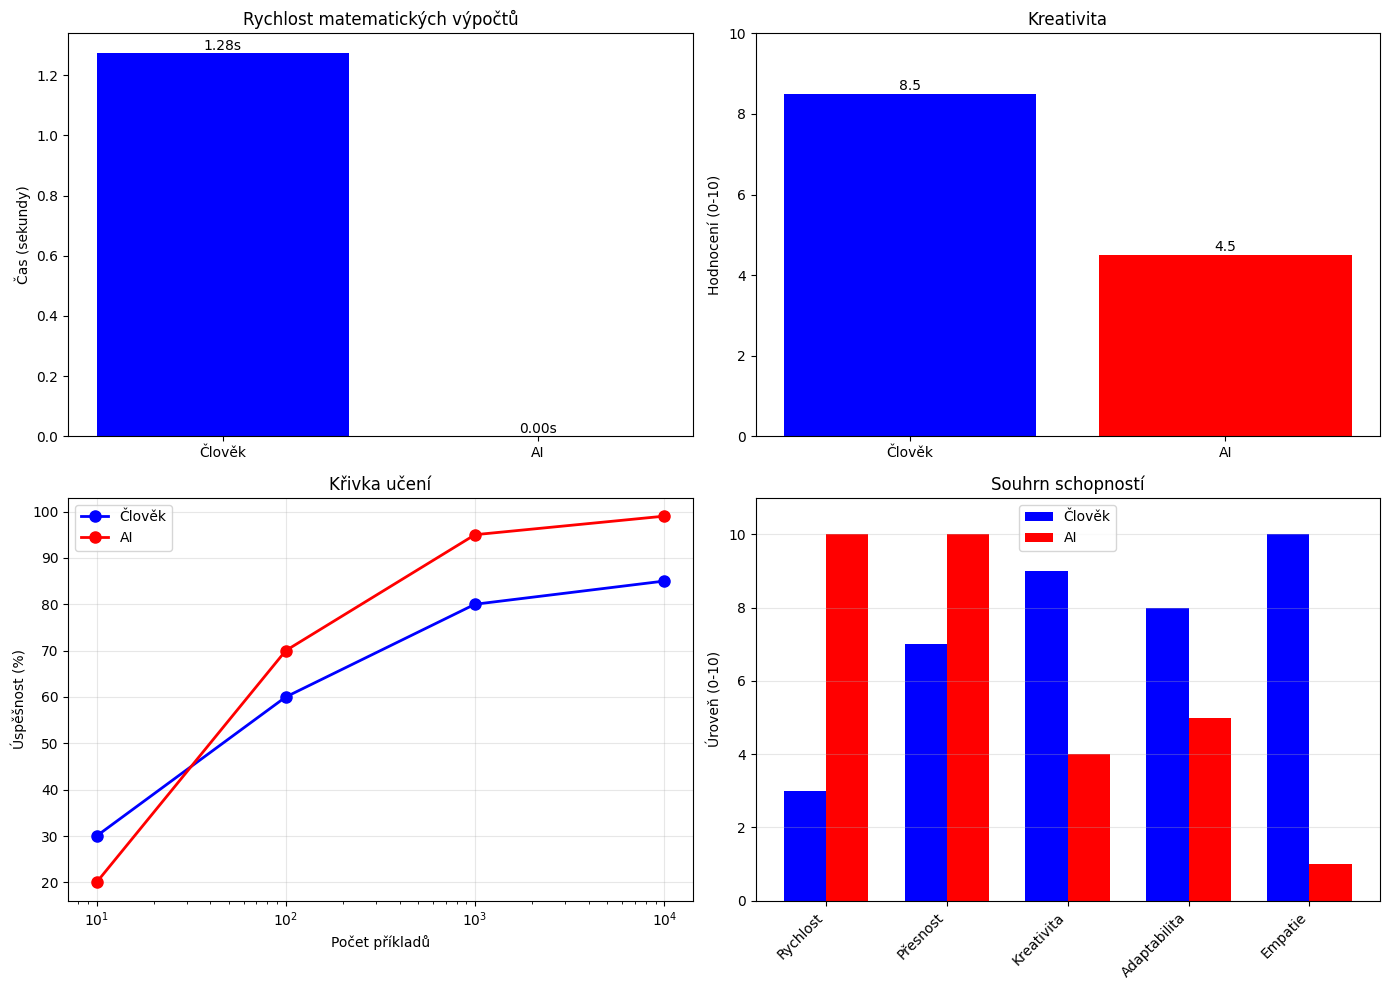

In [2]:
# Praktické srovnání: Člověk vs. AI v různých úlohách
import time
import random
import numpy as np
import matplotlib.pyplot as plt

class SrovnaniInteligence:
    def __init__(self):
        self.vysledky = {
            'clovek': {},
            'ai': {}
        }
    
    def test_vypocty(self, pocet=1000):
        """Test matematických výpočtů"""
        print("\n=== TEST 1: Matematické výpočty ===")
        
        # Simulace člověka
        start = time.time()
        chyby_clovek = 0
        for _ in range(pocet):
            a, b = random.randint(1, 100), random.randint(1, 100)
            # Člověk dělá občas chyby a je pomalejší
            time.sleep(0.001)  # Simulace času na výpočet
            if random.random() < 0.05:  # 5% chybovost
                chyby_clovek += 1
        cas_clovek = time.time() - start
        
        # AI výpočet
        start = time.time()
        chyby_ai = 0
        for _ in range(pocet):
            a, b = random.randint(1, 100), random.randint(1, 100)
            vysledek = a * b  # AI počítá přesně a rychle
        cas_ai = time.time() - start
        
        self.vysledky['clovek']['vypocty'] = {
            'cas': cas_clovek, 
            'presnost': (pocet - chyby_clovek) / pocet * 100
        }
        self.vysledky['ai']['vypocty'] = {
            'cas': cas_ai, 
            'presnost': 100
        }
        
        print(f"Člověk: {cas_clovek:.2f}s, přesnost: {self.vysledky['clovek']['vypocty']['presnost']:.1f}%")
        print(f"AI: {cas_ai:.2f}s, přesnost: {self.vysledky['ai']['vypocty']['presnost']:.1f}%")
    
    def test_kreativita(self):
        """Test kreativity"""
        print("\n=== TEST 2: Kreativita ===")
        
        # Hodnocení kreativity (simulace)
        ulohy = [
            "Vymyslet nový příběh",
            "Navrhnout originální řešení",
            "Vytvořit umělecké dílo",
            "Improvizovat v nečekané situaci"
        ]
        
        hodnoceni_clovek = [8, 9, 9, 8]  # Z 10
        hodnoceni_ai = [6, 5, 4, 3]  # Z 10
        
        self.vysledky['clovek']['kreativita'] = np.mean(hodnoceni_clovek)
        self.vysledky['ai']['kreativita'] = np.mean(hodnoceni_ai)
        
        for uloha, h_clovek, h_ai in zip(ulohy, hodnoceni_clovek, hodnoceni_ai):
            print(f"{uloha}: Člověk {h_clovek}/10, AI {h_ai}/10")
    
    def test_uceni(self):
        """Test rychlosti učení"""
        print("\n=== TEST 3: Rychlost učení ===")
        
        # Simulace učení nového konceptu
        priklady_k_nauceni = [10, 100, 1000, 10000]
        
        vykon_clovek = [30, 60, 80, 85]  # % úspěšnosti
        vykon_ai = [20, 70, 95, 99]  # % úspěšnosti
        
        self.vysledky['clovek']['uceni'] = vykon_clovek
        self.vysledky['ai']['uceni'] = vykon_ai
        
        print("Úspěšnost po X příkladech:")
        for priklady, v_clovek, v_ai in zip(priklady_k_nauceni, vykon_clovek, vykon_ai):
            print(f"{priklady} příkladů: Člověk {v_clovek}%, AI {v_ai}%")
    
    def vizualizuj_vysledky(self):
        """Vizualizace výsledků srovnání"""
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        
        # 1. Rychlost výpočtů
        ax1 = axes[0, 0]
        kategorie = ['Člověk', 'AI']
        rychlosti = [self.vysledky['clovek']['vypocty']['cas'], 
                     self.vysledky['ai']['vypocty']['cas']]
        bars1 = ax1.bar(kategorie, rychlosti, color=['blue', 'red'])
        ax1.set_ylabel('Čas (sekundy)')
        ax1.set_title('Rychlost matematických výpočtů', fontsize=12)
        for bar, val in zip(bars1, rychlosti):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.2f}s', ha='center')
        
        # 2. Kreativita
        ax2 = axes[0, 1]
        kreativita = [self.vysledky['clovek']['kreativita'], 
                      self.vysledky['ai']['kreativita']]
        bars2 = ax2.bar(kategorie, kreativita, color=['blue', 'red'])
        ax2.set_ylabel('Hodnocení (0-10)')
        ax2.set_title('Kreativita', fontsize=12)
        ax2.set_ylim(0, 10)
        for bar, val in zip(bars2, kreativita):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{val:.1f}', ha='center')
        
        # 3. Křivka učení
        ax3 = axes[1, 0]
        priklady = [10, 100, 1000, 10000]
        ax3.plot(priklady, self.vysledky['clovek']['uceni'], 'bo-', 
                label='Člověk', linewidth=2, markersize=8)
        ax3.plot(priklady, self.vysledky['ai']['uceni'], 'ro-', 
                label='AI', linewidth=2, markersize=8)
        ax3.set_xscale('log')
        ax3.set_xlabel('Počet příkladů')
        ax3.set_ylabel('Úspěšnost (%)')
        ax3.set_title('Křivka učení', fontsize=12)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # 4. Souhrn schopností
        ax4 = axes[1, 1]
        schopnosti = ['Rychlost', 'Přesnost', 'Kreativita', 'Adaptabilita', 'Empatie']
        hodnoty_clovek = [3, 7, 9, 8, 10]
        hodnoty_ai = [10, 10, 4, 5, 1]
        
        x = np.arange(len(schopnosti))
        width = 0.35
        
        bars_c = ax4.bar(x - width/2, hodnoty_clovek, width, label='Člověk', color='blue')
        bars_a = ax4.bar(x + width/2, hodnoty_ai, width, label='AI', color='red')
        
        ax4.set_ylabel('Úroveň (0-10)')
        ax4.set_title('Souhrn schopností', fontsize=12)
        ax4.set_xticks(x)
        ax4.set_xticklabels(schopnosti, rotation=45, ha='right')
        ax4.legend()
        ax4.set_ylim(0, 11)
        ax4.grid(True, axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.show()

# Spuštění srovnání
srovnani = SrovnaniInteligence()
srovnani.test_vypocty()
srovnani.test_kreativita()
srovnani.test_uceni()
srovnani.vizualizuj_vysledky()

## 3. Silné a slabé stránky

### Lidská inteligence - silné stránky:
- ✅ Obecná inteligence a adaptabilita
- ✅ Kreativita a originalita
- ✅ Emoční inteligence a empatie
- ✅ Intuice a "zdravý rozum"
- ✅ Kontextové porozumění
- ✅ Etické uvažování

### Lidská inteligence - slabé stránky:
- ❌ Omezená rychlost zpracování
- ❌ Únava a pokles výkonu
- ❌ Kognitivní zkreslení
- ❌ Omezená paměť
- ❌ Emocionální ovlivnění

### Strojová inteligence - silné stránky:
- ✅ Extrémní rychlost a výkon
- ✅ Perfektní paměť
- ✅ Konzistentní výkon 24/7
- ✅ Zpracování velkých dat
- ✅ Přesnost v definovaných úlohách
- ✅ Škálovatelnost

### Strojová inteligence - slabé stránky:
- ❌ Úzká specializace
- ❌ Nedostatek kreativity
- ❌ Absence emocí a empatie
- ❌ Závislost na datech
- ❌ Nedostatek "zdravého rozumu"
- ❌ Obtížná generalizace


=== TEST: Potvrzovací zkreslení ===
Úkol: Najít pravidlo pro trojici čísel
Počáteční trojice splňující pravidlo: 2, 4, 6

Lidské testování (potvrzovací zkreslení):
Test (4, 8, 12) - sudá čísla +4: ✓
Test (6, 12, 18) - násobky 6: ✓
Test (10, 20, 30) - násobky 10: ✓

AI testování (systematické):
Test (1, 2, 3) - malá vzestupná: ✓
Test (3, 2, 1) - sestupná: ✗
Test (1, 5, 9) - různé intervaly: ✓
Test (-5, 0, 5) - včetně záporných: ✓

Závěr: Lidé často hledají pouze potvrzení své hypotézy,
zatímco AI testuje systematicky různé možnosti.

=== TEST: Halo efekt ===
Hodnocení osoby na základě prvního dojmu

Lidské hodnocení (s halo efektem):
Jan (upravený): {'inteligence': 9, 'spolehlivost': 7, 'kreativita': 8}
Petr (neupravený): {'inteligence': 7, 'spolehlivost': 6, 'kreativita': 6}

AI hodnocení (objektivní):
Jan: {'inteligence': 7, 'spolehlivost': 5, 'kreativita': 6}
Petr: {'inteligence': 9, 'spolehlivost': 8, 'kreativita': 8}


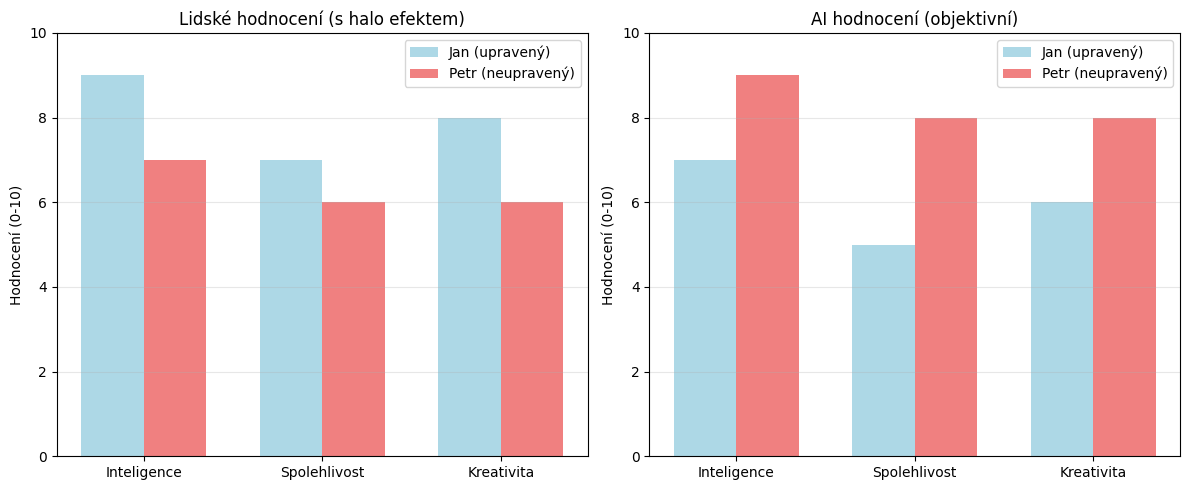


Lidé jsou náchylní ke kognitivním zkreslením,
zatímco AI hodnotí objektivně na základě dat.


In [3]:
# Demonstrace kognitivních zkreslení u lidí vs. AI
import random
import matplotlib.pyplot as plt

class KognitivniZkresleni:
    def __init__(self):
        self.vysledky = []
    
    def test_potvrzovaci_zkresleni(self):
        """Test konfirmačního zkreslení"""
        print("\n=== TEST: Potvrzovací zkreslení ===")
        print("Úkol: Najít pravidlo pro trojici čísel")
        print("Počáteční trojice splňující pravidlo: 2, 4, 6")
        
        # Skutečné pravidlo: vzestupná posloupnost
        def spravne_pravidlo(a, b, c):
            return a < b < c
        
        # Lidské odpovědi (typicky hledají potvrzení své hypotézy)
        lidske_testy = [
            (4, 8, 12, "sudá čísla +4"),
            (6, 12, 18, "násobky 6"),
            (10, 20, 30, "násobky 10")
        ]
        
        # AI testy (systematické testování)
        ai_testy = [
            (1, 2, 3, "malá vzestupná"),
            (3, 2, 1, "sestupná"),
            (1, 5, 9, "různé intervaly"),
            (-5, 0, 5, "včetně záporných")
        ]
        
        print("\nLidské testování (potvrzovací zkreslení):")
        for a, b, c, hypoteza in lidske_testy:
            vysledek = spravne_pravidlo(a, b, c)
            print(f"Test ({a}, {b}, {c}) - {hypoteza}: {'✓' if vysledek else '✗'}")
        
        print("\nAI testování (systematické):")
        for a, b, c, hypoteza in ai_testy:
            vysledek = spravne_pravidlo(a, b, c)
            print(f"Test ({a}, {b}, {c}) - {hypoteza}: {'✓' if vysledek else '✗'}")
        
        print("\nZávěr: Lidé často hledají pouze potvrzení své hypotézy,")
        print("zatímco AI testuje systematicky různé možnosti.")
    
    def test_halo_efekt(self):
        """Test halo efektu"""
        print("\n=== TEST: Halo efekt ===")
        print("Hodnocení osoby na základě prvního dojmu")
        
        osoby = [
            {"jmeno": "Jan", "prvni_dojem": "upravený", 
             "skutecne_vlastnosti": {"inteligence": 7, "spolehlivost": 5, "kreativita": 6}},
            {"jmeno": "Petr", "prvni_dojem": "neupravený", 
             "skutecne_vlastnosti": {"inteligence": 9, "spolehlivost": 8, "kreativita": 8}}
        ]
        
        print("\nLidské hodnocení (s halo efektem):")
        for osoba in osoby:
            if osoba["prvni_dojem"] == "upravený":
                # Pozitivní halo efekt
                hodnoceni = {k: min(10, v + 2) for k, v in osoba["skutecne_vlastnosti"].items()}
            else:
                # Negativní halo efekt
                hodnoceni = {k: max(1, v - 2) for k, v in osoba["skutecne_vlastnosti"].items()}
            
            print(f"{osoba['jmeno']} ({osoba['prvni_dojem']}): {hodnoceni}")
        
        print("\nAI hodnocení (objektivní):")
        for osoba in osoby:
            print(f"{osoba['jmeno']}: {osoba['skutecne_vlastnosti']}")
        
        return osoby

# Demonstrace
tester = KognitivniZkresleni()
tester.test_potvrzovaci_zkresleni()
osoby_data = tester.test_halo_efekt()

# Vizualizace halo efektu
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

vlastnosti = ['Inteligence', 'Spolehlivost', 'Kreativita']
x = np.arange(len(vlastnosti))
width = 0.35

for i, (ax, title) in enumerate([(ax1, 'Lidské hodnocení (s halo efektem)'), 
                                  (ax2, 'AI hodnocení (objektivní)')]):
    jan_hodnoty = []
    petr_hodnoty = []
    
    for vlastnost in ['inteligence', 'spolehlivost', 'kreativita']:
        if i == 0:  # Lidské hodnocení
            jan_hodnoty.append(osoby_data[0]['skutecne_vlastnosti'][vlastnost] + 2)
            petr_hodnoty.append(osoby_data[1]['skutecne_vlastnosti'][vlastnost] - 2)
        else:  # AI hodnocení
            jan_hodnoty.append(osoby_data[0]['skutecne_vlastnosti'][vlastnost])
            petr_hodnoty.append(osoby_data[1]['skutecne_vlastnosti'][vlastnost])
    
    ax.bar(x - width/2, jan_hodnoty, width, label='Jan (upravený)', color='lightblue')
    ax.bar(x + width/2, petr_hodnoty, width, label='Petr (neupravený)', color='lightcoral')
    
    ax.set_ylabel('Hodnocení (0-10)')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(vlastnosti)
    ax.legend()
    ax.set_ylim(0, 10)
    ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLidé jsou náchylní ke kognitivním zkreslením,")
print("zatímco AI hodnotí objektivně na základě dat.")

## 4. Synergie: Spolupráce člověka a AI

### Nejlepší z obou světů:
Budoucnost není o nahrazení člověka strojem, ale o jejich spolupráci.

### Příklady úspěšné spolupráce:

1. **Medicína**
   - AI: Rychlá diagnostika z obrazových dat
   - Člověk: Konečné rozhodnutí a péče o pacienta

2. **Kreativní práce**
   - AI: Generování návrhů a variant
   - Člověk: Výběr a finální úpravy

3. **Vědecký výzkum**
   - AI: Analýza dat a hledání vzorů
   - Člověk: Formulace hypotéz a interpretace

4. **Rozhodování**
   - AI: Poskytnutí dat a predikcí
   - Člověk: Etické a strategické rozhodnutí


=== SIMULACE: Lékařská diagnostika ===

=== SIMULACE: Kreativní projekt (design loga) ===


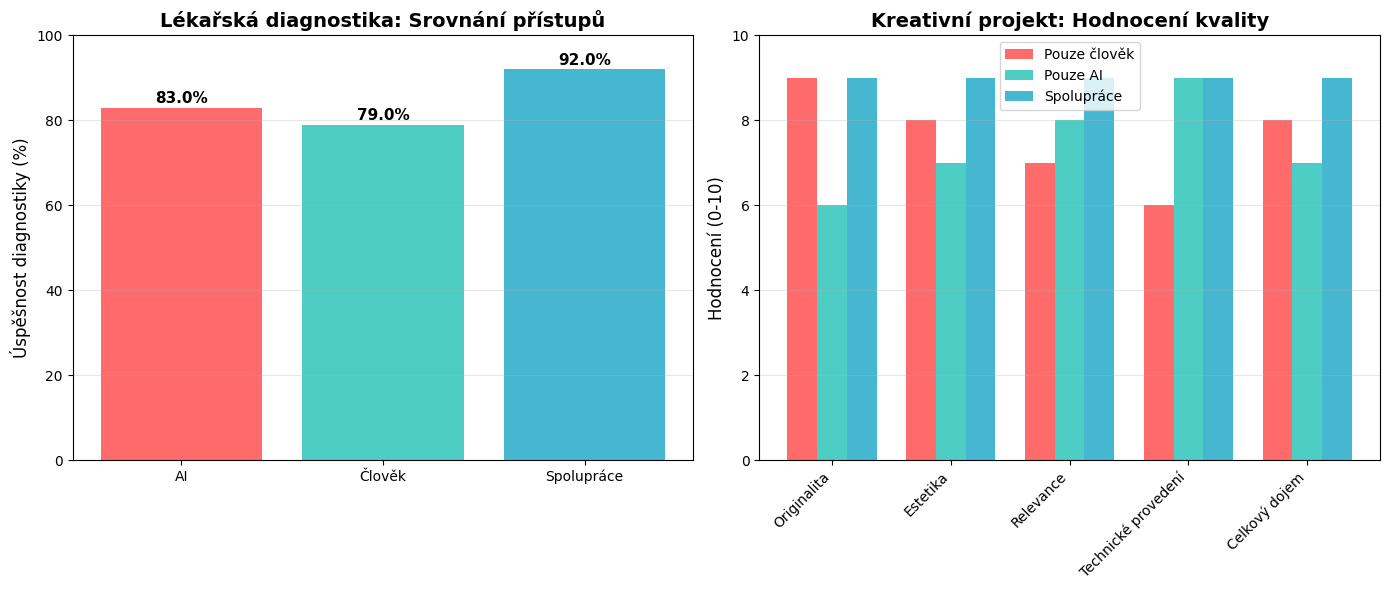


Výsledky lékařské diagnostiky:
AI: 83.0% úspěšnost
Člověk: 79.0% úspěšnost
Spolupráce: 92.0% úspěšnost

Závěr: Spolupráce člověka a AI přináší nejlepší výsledky!
- AI zajišťuje rychlost a konzistenci
- Člověk přidává kontext, kreativitu a etické rozhodování
- Společně dosahují výsledků, kterých by jednotlivě nedosáhli


In [4]:
# Simulace spolupráce člověka a AI
import numpy as np
import matplotlib.pyplot as plt

class SpolupraceSimulator:
    def __init__(self):
        self.vysledky = []
    
    def diagnoza_simulace(self, pocet_pacientu=100):
        """Simulace lékařské diagnostiky"""
        print("\n=== SIMULACE: Lékařská diagnostika ===")
        
        # Generování pacientů
        pacienti = []
        for i in range(pocet_pacientu):
            # 30% má vzácnou nemoc, kterou AI těžko rozpozná
            vzacna_nemoc = random.random() < 0.3
            # 70% má běžnou nemoc
            bezna_nemoc = not vzacna_nemoc
            
            pacienti.append({
                'id': i,
                'vzacna_nemoc': vzacna_nemoc,
                'bezna_nemoc': bezna_nemoc,
                'komplikace': random.random() < 0.2  # 20% má komplikace
            })
        
        # Pouze AI
        ai_spravne = 0
        for pacient in pacienti:
            if pacient['bezna_nemoc']:
                # AI je výborná v běžných případech
                if random.random() < 0.95:
                    ai_spravne += 1
            else:
                # AI má problém se vzácnými případy
                if random.random() < 0.60:
                    ai_spravne += 1
        
        # Pouze člověk
        clovek_spravne = 0
        for pacient in pacienti:
            if pacient['vzacna_nemoc']:
                # Člověk lépe rozpozná vzácné případy
                if random.random() < 0.80:
                    clovek_spravne += 1
            else:
                # Člověk je dobrý, ale ne tak konzistentní
                if random.random() < 0.85:
                    clovek_spravne += 1
        
        # Spolupráce
        spoluprace_spravne = 0
        for pacient in pacienti:
            # AI dělá první screening
            ai_jistota = 0.95 if pacient['bezna_nemoc'] else 0.60
            
            # Pokud si AI není jistá, zapojí se člověk
            if ai_jistota < 0.8 or pacient['komplikace']:
                # Člověk zkontroluje složité případy
                if random.random() < 0.90:
                    spoluprace_spravne += 1
            else:
                # AI zvládne jednoduché případy
                if random.random() < ai_jistota:
                    spoluprace_spravne += 1
        
        # Výsledky
        vysledky = {
            'AI': ai_spravne / pocet_pacientu * 100,
            'Člověk': clovek_spravne / pocet_pacientu * 100,
            'Spolupráce': spoluprace_spravne / pocet_pacientu * 100
        }
        
        return vysledky, pacienti
    
    def kreativni_projekt(self):
        """Simulace kreativního projektu"""
        print("\n=== SIMULACE: Kreativní projekt (design loga) ===")
        
        kriteria = ['Originalita', 'Estetika', 'Relevance', 'Technické provedení', 'Celkový dojem']
        
        # Hodnocení různých přístupů (0-10)
        pouze_clovek = [9, 8, 7, 6, 8]
        pouze_ai = [6, 7, 8, 9, 7]
        spoluprace = [9, 9, 9, 9, 9]
        
        return kriteria, pouze_clovek, pouze_ai, spoluprace

# Spuštění simulací
simulator = SpolupraceSimulator()

# 1. Lékařská diagnostika
vysledky_med, pacienti = simulator.diagnoza_simulace()

# 2. Kreativní projekt
kriteria, clovek_hod, ai_hod, spol_hod = simulator.kreativni_projekt()

# Vizualizace
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graf 1: Úspěšnost diagnostiky
metody = list(vysledky_med.keys())
uspesnost = list(vysledky_med.values())
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

bars = ax1.bar(metody, uspesnost, color=colors)
ax1.set_ylabel('Úspěšnost diagnostiky (%)', fontsize=12)
ax1.set_title('Lékařská diagnostika: Srovnání přístupů', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 100)

# Přidání hodnot na sloupce
for bar, val in zip(bars, uspesnost):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
            f'{val:.1f}%', ha='center', fontsize=11, fontweight='bold')

ax1.grid(True, axis='y', alpha=0.3)

# Graf 2: Kreativní projekt
x = np.arange(len(kriteria))
width = 0.25

ax2.bar(x - width, clovek_hod, width, label='Pouze člověk', color='#FF6B6B')
ax2.bar(x, ai_hod, width, label='Pouze AI', color='#4ECDC4')
ax2.bar(x + width, spol_hod, width, label='Spolupráce', color='#45B7D1')

ax2.set_ylabel('Hodnocení (0-10)', fontsize=12)
ax2.set_title('Kreativní projekt: Hodnocení kvality', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(kriteria, rotation=45, ha='right')
ax2.legend()
ax2.set_ylim(0, 10)
ax2.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVýsledky lékařské diagnostiky:")
for metoda, uspesnost in vysledky_med.items():
    print(f"{metoda}: {uspesnost:.1f}% úspěšnost")

print("\nZávěr: Spolupráce člověka a AI přináší nejlepší výsledky!")
print("- AI zajišťuje rychlost a konzistenci")
print("- Člověk přidává kontext, kreativitu a etické rozhodování")
print("- Společně dosahují výsledků, kterých by jednotlivě nedosáhli")

## 5. Budoucnost spolužití

### Klíčové principy:

1. **Komplementarita, ne konkurence**
   - AI a lidé se doplňují
   - Každý dělá to, v čem je nejlepší

2. **Augmentace, ne nahrazení**
   - AI zesiluje lidské schopnosti
   - Člověk zůstává v centru rozhodování

3. **Kontinuální učení**
   - Lidé se učí pracovat s AI
   - AI se učí od lidí

4. **Etické hranice**
   - Jasná pravidla pro použití AI
   - Zachování lidské důstojnosti

## 6. Cvičení a úkoly

### Úkol 1: Sebehodnocení

In [5]:
# Úkol: Vytvořte vlastní profil inteligence
def muj_profil_inteligence():
    """
    Ohodnoťte své schopnosti na škále 1-10 a porovnejte s AI.
    """
    moje_schopnosti = {
        'matematika': 0,  # Vaše hodnocení 1-10
        'jazyky': 0,
        'kreativita': 0,
        'empatie': 0,
        'pamet': 0,
        'rychlost_uceni': 0,
        'reseni_problemu': 0,
        'fyzicka_obratnost': 0
    }
    
    # Pro srovnání - typické AI schopnosti
    ai_schopnosti = {
        'matematika': 10,
        'jazyky': 7,
        'kreativita': 4,
        'empatie': 1,
        'pamet': 10,
        'rychlost_uceni': 8,
        'reseni_problemu': 7,
        'fyzicka_obratnost': 2
    }
    
    # TODO: Vyplňte své hodnocení a vytvořte vizualizaci
    
    return moje_schopnosti, ai_schopnosti

# Test
# moje, ai = muj_profil_inteligence()
# Vytvořte graf porovnávající vaše schopnosti s AI

### Úkol 2: Diskuse

Zamyslete se a diskutujte:
1. V čem je lidská inteligence nenahraditelná?
2. Kde by AI mohla pomoci zlepšit váš život?
3. Jaké jsou etické hranice použití AI?

### Úkol 3: Návrh spolupráce
Navrhněte konkrétní příklad, jak byste mohli spolupracovat s AI ve svém oblíbeném oboru nebo koníčku.

## 7. Shrnutí

### Co jsme se naučili:
- ✅ Charakteristiky lidské a strojové inteligence
- ✅ Silné a slabé stránky obou typů
- ✅ Kognitivní zkreslení vs. objektivita
- ✅ Síla spolupráce člověka a AI
- ✅ Principy budoucího spolužití

### Klíčové poznatky:
1. **Jsme rozdílní, ale komplementární**
2. **AI není hrozba, ale nástroj**
3. **Budoucnost je ve spolupráci**
4. **Lidskost zůstává unikátní**

### Příště:
V další hodině se podíváme na etické a filozofické otázky AI.

## 8. Domácí úkol

1. **Experiment**: Po dobu jednoho dne si zapisujte úkoly, které děláte. Označte, které by mohla dělat AI lépe, které vy lépe, a které byste mohli dělat společně.

2. **Esej (250 slov)**: "Co dělá člověka člověkem v éře AI?"

3. **Praktický úkol**: Vyzkoušejte nějaký AI nástroj (např. překladač, asistent) a popište:
   - V čem vám pomohl
   - Kde byly jeho limity
   - Jak byste ho vylepšili

4. **Kreativní úkol**: Nakreslete nebo popište, jak si představujete ideální spolupráci člověka a AI za 10 let.

---

**Myšlenka na závěr**: "AI nás nenahradí, ale ti, kdo umí s AI pracovat, nahradí ty, kdo to neumí."